In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import collections

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Lire et comprendre les données

In [2]:
# reading the JSON data using json.load()
filename = './data/Brisbane_CityBike.json'
with open(filename, 'r') as f:
  datastore = json.load(f)

# show raw data
datastore

[{'number': 122,
  'name': '122 - LOWER RIVER TCE / ELLIS ST',
  'address': 'Lower River Tce / Ellis St',
  'latitude': -27.482279,
  'longitude': 153.028723},
 {'number': 91,
  'name': '91 - MAIN ST / DARRAGH ST',
  'address': 'Main St / Darragh St',
  'latitude': -27.47059,
  'longitude': 153.036046},
 {'number': 88,
  'name': '88 - SYDNEY ST FERRY TERMINAL / PARK',
  'address': 'Sydney St Ferry Terminal / Park',
  'latitude': -27.474531,
  'longitude': 153.042728},
 {'number': 75,
  'name': '75 - BROWNE ST / JAMES ST',
  'address': 'Browne St / James St',
  'latitude': -27.461881,
  'longitude': 153.046986},
 {'number': 98,
  'name': '98 - KURILPA POINT / MONTAGUE RD',
  'address': 'Kurilpa Point / Montague Rd',
  'latitude': -27.469658,
  'longitude': 153.016696},
 {'number': 109,
  'name': '109 - MONTAGUE RD / SKINNER ST',
  'address': 'Montague Rd / Skinner St',
  'latitude': -27.48172,
  'longitude': 153.00436},
 {'number': 149,
  'name': '149 - MACQUARIE ST / GUYATT PARK',
  'a

In [3]:
# reading the JSON data as pandas Dataframe
df = pd.read_json (filename)

# show data head
df.head()

,number,name,address,latitude,longitude
0,122,122 - LOWER RIVER TCE / ELLIS ST,Lower River Tce / Ellis St,-27.482279,153.028723
1,91,91 - MAIN ST / DARRAGH ST,Main St / Darragh St,-27.470590,153.036046
2,88,88 - SYDNEY ST FERRY TERMINAL / PARK,Sydney St Ferry Terminal / Park,-27.474531,153.042728
3,75,75 - BROWNE ST / JAMES ST,Browne St / James St,-27.461881,153.046986
4,98,98 - KURILPA POINT / MONTAGUE RD,Kurilpa Point / Montague Rd,-27.469658,153.016696


In [4]:
# show data shape
df.shape

(149, 5)

In [5]:
# describe numerical features
df.describe()

,number,latitude,longitude
count,149.000000,149.000000,149.000000
mean,83.194631,-27.471305,153.025083
std,94.320019,0.010892,0.015057
min,1.000000,-27.499963,152.990627
25%,40.000000,-27.478653,153.014760
50%,77.000000,-27.470110,153.026861
75%,114.000000,-27.464681,153.035533
max,1101.000000,-27.448074,153.053645


## Visualiser les données

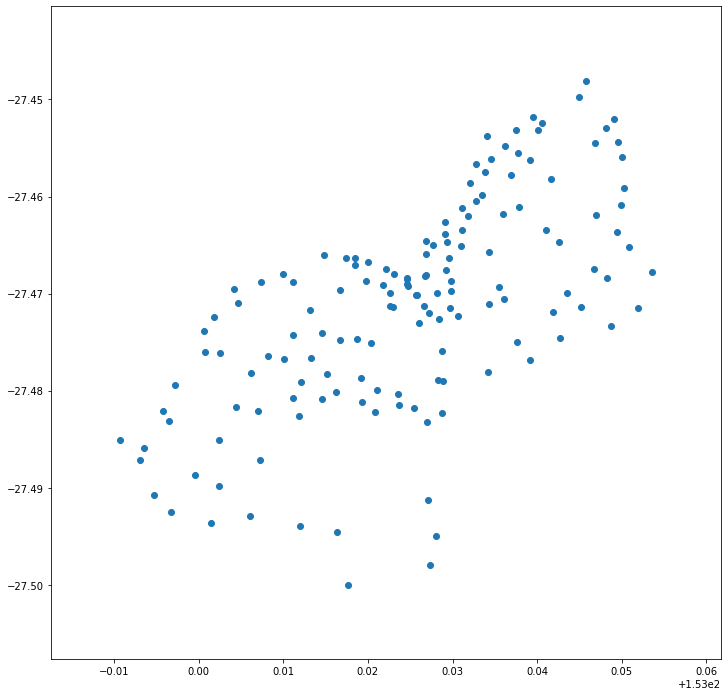

In [6]:
# simple plot for geographic data
plt.figure(figsize = (12,12))
plt.scatter(df.longitude, df.latitude)
plt.show()

In [7]:
# get the bounding box to import brisbane map from openstreetmap.org
BBox = ((df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max()))
BBox


(152.990627, 153.053645, -27.499963, -27.448074)

In [8]:
# read the map
brisbane = plt.imread('./data/brisbane.png')

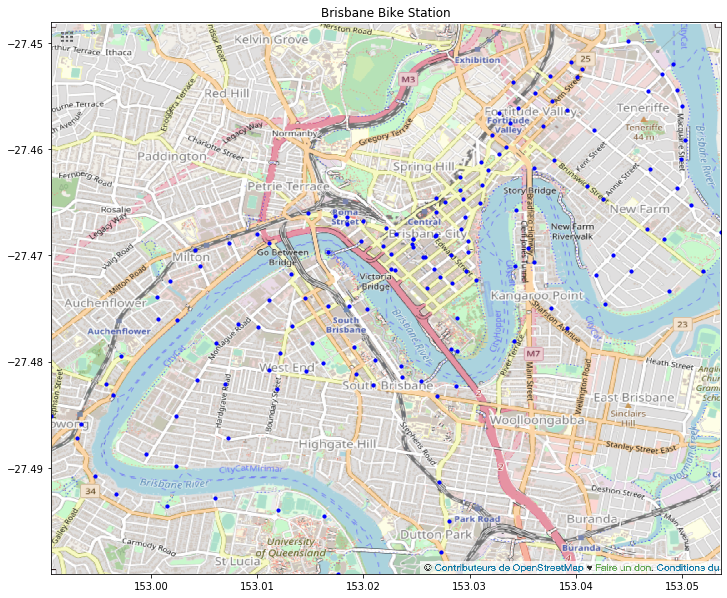

In [9]:
# show bike station on Brisbane map
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 1, c='b', s=10)
ax.set_title('Brisbane Bike Station')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(brisbane, zorder=0, extent = BBox, aspect= 'equal')

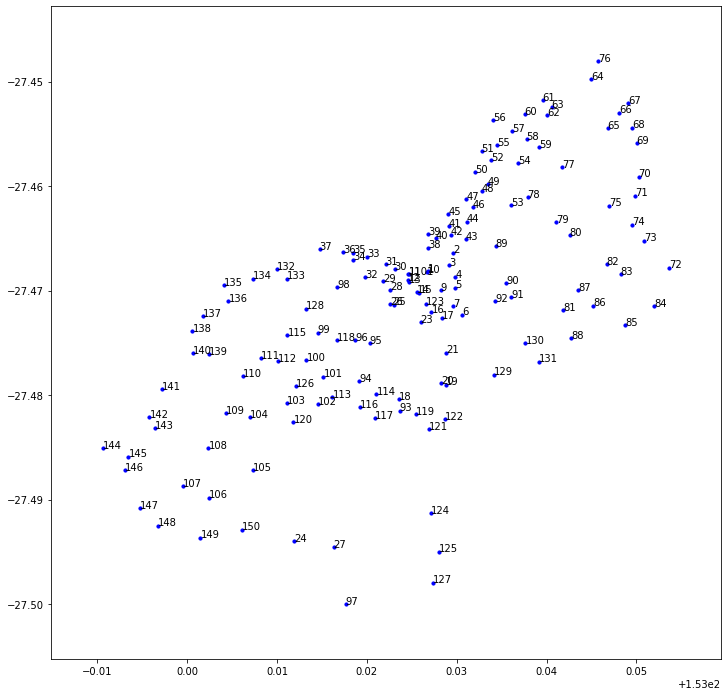

In [10]:
# show bike station with annotated with numbers
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(df.longitude, df.latitude, c='b', s=10)

for i, txt in enumerate(df.number):
    ax.annotate(txt, (df.longitude[i], df.latitude[i]))


# Kmeans Clustering suivant les données de localisation

Choix du K optimum en utlisant le critère de coude et le coefficient de silouhette:




In [12]:
# looking for optimum k using elbow and silouhette graph

X = df.loc[:, ['latitude','longitude']]


# create the within-cluster sums of squares (WCSS) to choose the number of clusters
wcss = []
# create the silouhette average score to choose the number of clusters
silhouette_avg = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    if i==1:
        silhouette_avg.append(0)
    else:
        silhouette_avg.append(silhouette_score(X, kmeans.labels_))

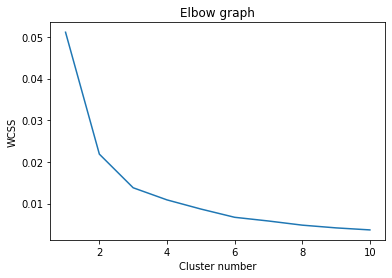

In [13]:
# plot Elbow graph
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

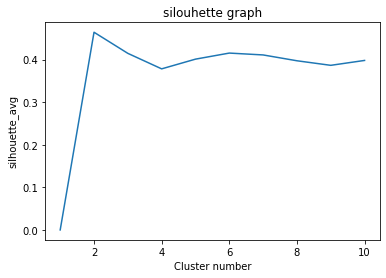

In [14]:
# plot silouhette graph
plt.plot(range(1,11), silhouette_avg)
plt.title('silouhette graph')
plt.xlabel('Cluster number')
plt.ylabel('silhouette_avg')
plt.show()

Clustering avec k optimal égal à 6:

In [15]:
# kmeans clustering with optimum k
k = 6
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(X)

In [16]:
# count population per cluster
collections.Counter(clusters)

Counter({1: 17, 2: 46, 4: 18, 5: 27, 3: 16, 0: 25})

Visualisation des Clusters:


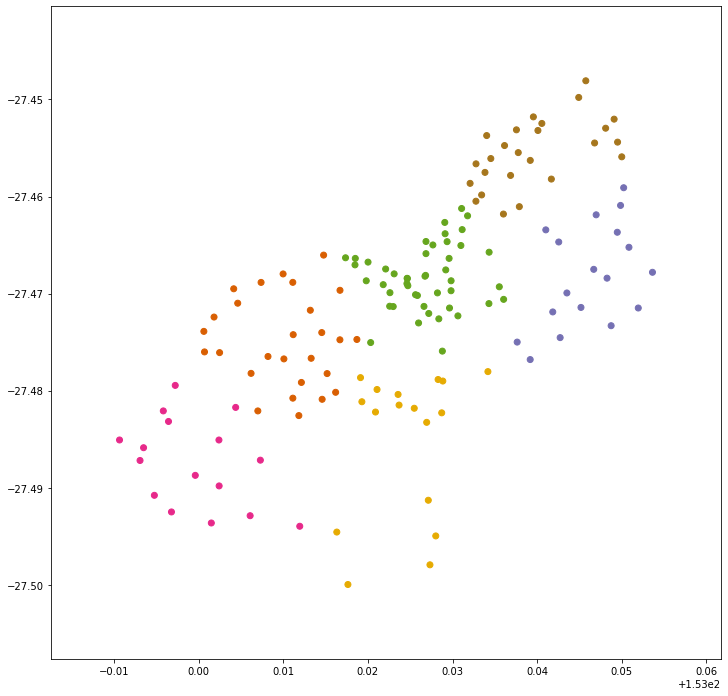

In [30]:
# show clustering result on simple plot

#costumize colors
colors = sns.color_palette('Dark2_r', k)

plt.figure(figsize = (12,12))
plt.scatter(df.longitude, df.latitude, c=[colors[l] for l in clusters])

plt.show()

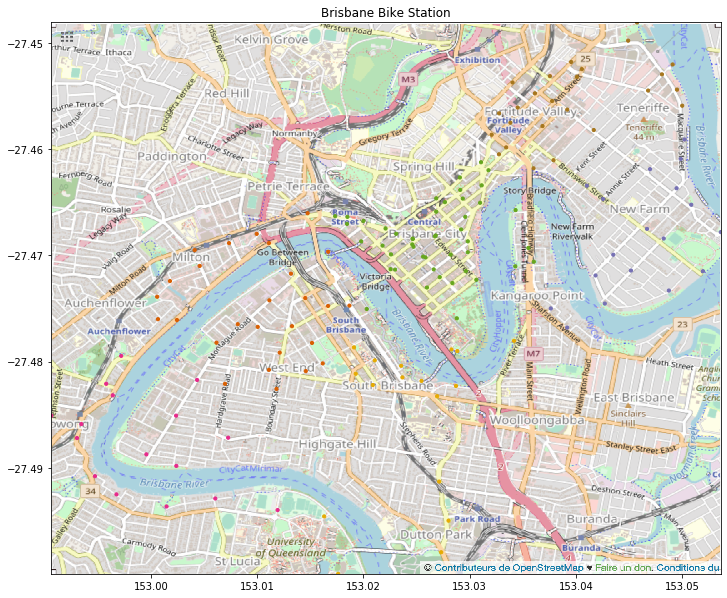

In [31]:
# show clustering result on Brisbane map
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha= 1, c=[colors[l] for l in clusters], s=10)
ax.set_title('Brisbane Bike Station')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(brisbane, zorder=0, extent = BBox, aspect= 'equal')